# Regex Examples

## 1. findall and sub

In [2]:
s3 = "In CS 320, there are 10 quizzes, 7 projects, 39 lectures, and 1000 things to learn.  CS 320 is awesome!"
s4 = """In CS 320,  there are 14 quizzes,    7 projects,
41 lectures, and 1000 things to learn.  CS 320 is awesome!"""

In [3]:
print(s3)

In CS 320, there are 10 quizzes, 7 projects, 39 lectures, and 1000 things to learn.  CS 320 is awesome!


In [11]:
# GOAL: make a dict (thing => count, like "projects" => 7)
import re

matches = re.findall(r"(\d+) (\w+)", s3)
matches

[('10', 'quizzes'),
 ('7', 'projects'),
 ('39', 'lectures'),
 ('1000', 'things'),
 ('320', 'is')]

In [12]:
d = {}
for count, thing in matches:
    d[thing] = int(count)
d

{'quizzes': 10, 'projects': 7, 'lectures': 39, 'things': 1000, 'is': 320}

In [14]:
# goal: normalize whitespace (everything will be a single space)
print(s4)

In CS 320,  there are 14 quizzes,    7 projects,
41 lectures, and 1000 things to learn.  CS 320 is awesome!


In [15]:
re.sub(r"\s+", " ", s4)

'In CS 320, there are 14 quizzes, 7 projects, 41 lectures, and 1000 things to learn. CS 320 is awesome!'

## 2. Git Logs

In [18]:
from subprocess import check_output

In [22]:
output = str(check_output(["git", "log"]), "utf-8")
print(output[:500])

commit db0b60608cae54b4f03d3865a2869d898f427b38
Author: Tyler <tharter@wisc.edu>
Date:   Fri Oct 28 17:48:45 2022 +0000

    oct 28 demos

commit 84beaa349296c3c1a997e09b1995bedd74c2af63
Author: Tyler <tharter@wisc.edu>
Date:   Wed Oct 26 18:23:15 2022 +0000

    oct 26 demos

commit 061df9417c373d4758b84b8f84c2c28b16268e1d
Merge: c3c2bfa e0c198c
Author: M. Iván Jaen M <ivanjaenm@gmail.com>
Date:   Fri Oct 21 22:27:34 2022 -0500

    Merge pull request #8 from cs320-wisc/P4
    
    P4

commit e


In [24]:
# GOAL: find all the commit numbers
commits = re.findall(r"[0-9a-f]{40}", output)
commits[:10]

['db0b60608cae54b4f03d3865a2869d898f427b38',
 '84beaa349296c3c1a997e09b1995bedd74c2af63',
 '061df9417c373d4758b84b8f84c2c28b16268e1d',
 'e0c198c43d15fe8a3bd939872108d9dcf8a8c45a',
 '5c2caab558065660b34e06aa11177c47f401ba22',
 'c3c2bfa4bcc283f30a0637cc1bf72c179ad11795',
 '1ff31fb833185b9ac91de417cee94454e038857c',
 '528d800bec00a02c2746455253ab5cfddd6a6800',
 '5c30c12e53564e60f50f5b01fe574a235da198f9',
 '7e4ef5de052312446162902ebc8d68532a7ce769']

In [39]:
# what days of the week do Tyler and the teaching team work (pushing stuff) the most?
days = re.findall(r"Date:\s+(\w+)", output)
days[:10]

['Fri', 'Wed', 'Fri', 'Fri', 'Fri', 'Fri', 'Fri', 'Fri', 'Thu', 'Thu']

In [36]:
import pandas as pd
pd.Series(days).value_counts()

Thu    39
Mon    17
Fri    14
Tue    12
Sat    10
Wed     9
Sun     6
dtype: int64

<AxesSubplot:>

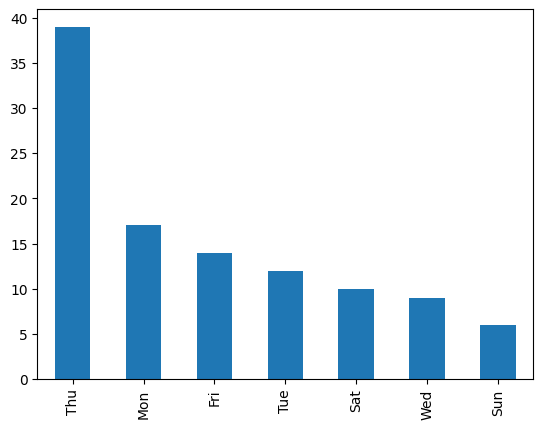

In [38]:
pd.Series(days).value_counts().plot.bar()

<AxesSubplot:>

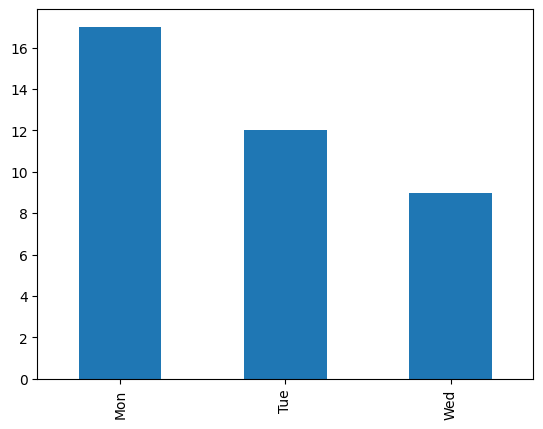

In [43]:
pd.Series(days).value_counts().loc[["Mon", "Tue", "Wed"]].plot.bar()

In [52]:
authors = re.findall(r"Author:\s+(.+?)\s*<", output)
authors[:10]

['Tyler',
 'Tyler',
 'M. Iván Jaen M',
 'Ivan Jaen-Marquez',
 'Ivan Jaen-Marquez',
 'Tyler Caraza-Harter',
 'Tyler',
 'Tyler',
 'Ivan Jaen-Marquez',
 'Ivan Jaen-Marquez']

In [58]:
# GOAL: find any lines that mentions a project
re.findall(r".*[pP][1-7].*", output)

['    Merge pull request #8 from cs320-wisc/P4',
 '    P4',
 '    Merge pull request #7 from cs320-wisc/P4',
 '    P4',
 '    Merge pull request #6 from cs320-wisc/P4',
 '    first changes to old p4',
 '    first push of p6 draft',
 '    added changes to old p4',
 '    release P3',
 '    release P2',
 '    release P2',
 '    p2 changes draft2',
 '    added instructions to testing to include format of p1.ipynb',
 '    p2 draft_1',
 '    p2 draft _1',
 '    p2 draft',
 '    dataset for p2',
 '    p1 typo',
 '    release p1 starter video',
 '    release p1 starter video',
 '    release p1',
 '    release p1',
 '    p1 CSVs']

In [28]:
print(output[:500])

commit db0b60608cae54b4f03d3865a2869d898f427b38
Author: Tyler <tharter@wisc.edu>
Date:   Fri Oct 28 17:48:45 2022 +0000

    oct 28 demos

commit 84beaa349296c3c1a997e09b1995bedd74c2af63
Author: Tyler <tharter@wisc.edu>
Date:   Wed Oct 26 18:23:15 2022 +0000

    oct 26 demos

commit 061df9417c373d4758b84b8f84c2c28b16268e1d
Merge: c3c2bfa e0c198c
Author: M. Iván Jaen M <ivanjaenm@gmail.com>
Date:   Fri Oct 21 22:27:34 2022 -0500

    Merge pull request #8 from cs320-wisc/P4
    
    P4

commit e


## 3. Emails

In [60]:
# TODO: use requests.get to download instead of copy/paste
s = """
Tyler [Instructor] - tharter (AT) wisc.edu
Cong [Head TA] - cding44 (AT) wisc.edu
Bryce [TA] - bcjohnson7 (AT) wisc.edu
Connor [TA] - cbailey9 (AT) wisc.edu
Han [TA] - hwang638 (AT) wisc.edu
Hardik [TA] - hchauhan2 (AT) wisc.edu
Keaton [TA] - kleppanen (AT) wisc.edu
Nils [TA] - npalumbo (AT) wisc.edu
Yiyin [TA] - yshen82 (AT) wisc.edu
tharter@wisc.edu
"""
print(s)


Tyler [Instructor] - tharter (AT) wisc.edu
Cong [Head TA] - cding44 (AT) wisc.edu
Bryce [TA] - bcjohnson7 (AT) wisc.edu
Connor [TA] - cbailey9 (AT) wisc.edu
Han [TA] - hwang638 (AT) wisc.edu
Hardik [TA] - hchauhan2 (AT) wisc.edu
Keaton [TA] - kleppanen (AT) wisc.edu
Nils [TA] - npalumbo (AT) wisc.edu
Yiyin [TA] - yshen82 (AT) wisc.edu
tharter@wisc.edu



In [69]:
name = r"\w+"
at = r"@|([\(\[]?[Aa][Tt][\)\]]?)"
domain = r"\w+\.(edu|com|org|net|io|gov)"

full_regex = f"(({name})\s*({at})\s*({domain}))"

print("REGEX:", full_regex)
for match in re.findall(full_regex, s):
    print(match[1] + "@" + match[4])

REGEX: ((\w+)\s*(@|([\(\[]?[Aa][Tt][\)\]]?))\s*(\w+\.(edu|com|org|net|io|gov)))
tharter@wisc.edu
cding44@wisc.edu
bcjohnson7@wisc.edu
cbailey9@wisc.edu
hwang638@wisc.edu
hchauhan2@wisc.edu
kleppanen@wisc.edu
npalumbo@wisc.edu
yshen82@wisc.edu
tharter@wisc.edu


## 4. Function Names